In [209]:
# import library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [210]:
# import Data set as train & test data set
df0 = pd.read_csv('A:/DataScience/project 1/train.csv')
df=pd.DataFrame(df0)
                 
df1 = pd.read_csv('A:/DataScience/project 1/test.csv') # test data set 

df.head()



,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


In [211]:
df.shape

(1048575, 3)

(time             0
 signal           0
 open_channels    0
 dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x21f85e16970>)

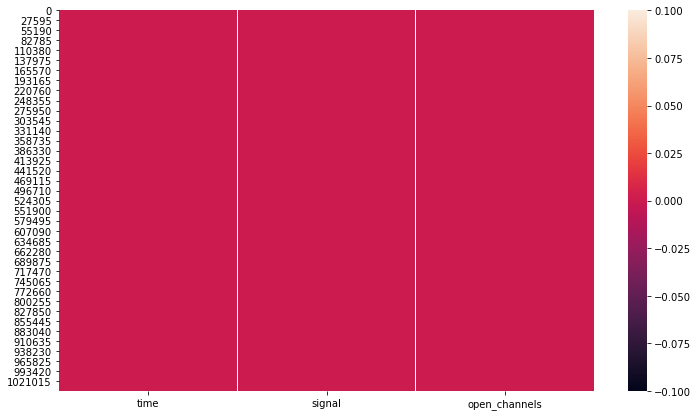

In [212]:
# is any missing value in data set 
plt.figure(figsize=(12,7))
df.isnull().sum(),   sns.heatmap(df.isnull())


There haven't any null or missing values in the Dataset let's go ahead

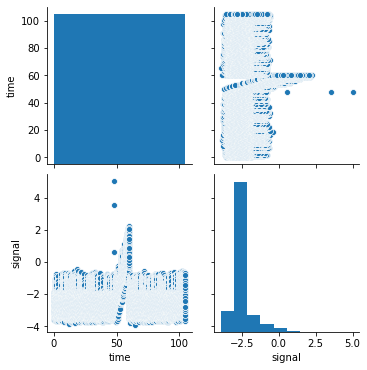

In [213]:
# Analysing relationship between columns

df['open_channels'].replace(1,'opened',inplace=True)
df['open_channels'].replace(0,'closed',inplace=True)

sns.pairplot(df)

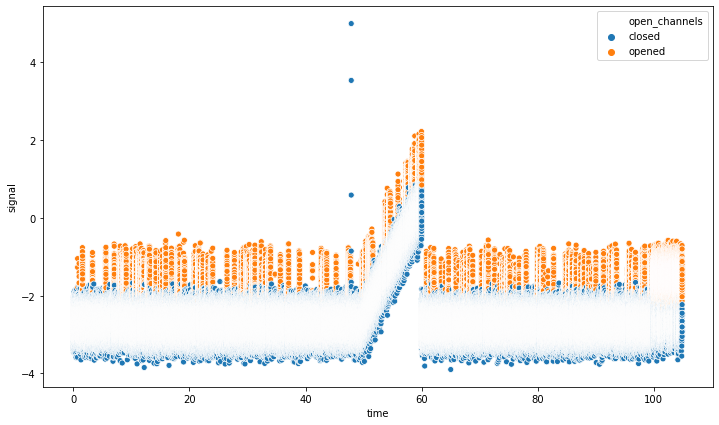

In [214]:
# scatter plotting
fig_dims=(12,7)
fig,ax= plt.subplots(figsize=fig_dims)
sns.scatterplot(x='time',y='signal',hue='open_channels',data=df, ax=ax)


 From scatter plot it is observed there have some outlier and anormaly data

In [219]:
# analysing signal if Monotonic or not 
signal = df['signal']
print(signal)
signal.is_monotonic 

0         -2.7600
1         -2.8557
2         -2.4074
3         -3.1404
4         -3.1525
            ...  
1048570   -2.4535
1048571   -2.8087
1048572   -2.8070
1048573   -1.5955
1048574   -1.4665
Name: signal, Length: 1048575, dtype: float64


False

So signals are non monotonic in nature 

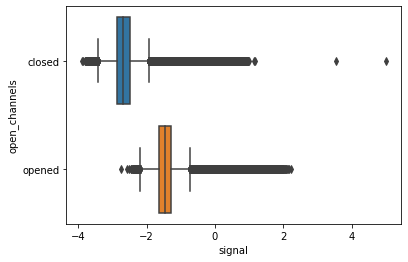

In [220]:
# we try to find datasets outliers 
sns.boxplot('signal','open_channels',data=df)

Hence we conclude that number of opened channels is between signal range -1 to -2 

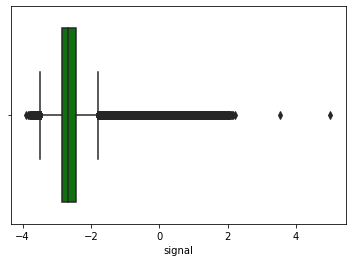

In [221]:
# Boxplot for signal
sns.boxplot('signal',color='g',data=df)

Analysis of signal Outliers

In [222]:
df.describe()

,time,signal
count,1.048575e+06,1.048575e+06
mean,5.242880e+01,-2.496901e+00
std,3.026977e+01,6.515743e-01
min,1.000000e-04,-3.902100e+00
25%,2.621445e+01,-2.858700e+00
50%,5.242880e+01,-2.670000e+00
75%,7.864315e+01,-2.435900e+00
max,1.048575e+02,4.999800e+00


In [223]:
max=df.signal.quantile(.98) 

In [224]:
min=df['signal'].quantile(.03)

In [225]:
dfnew=df[(df.signal<max) & (df.signal>min)]

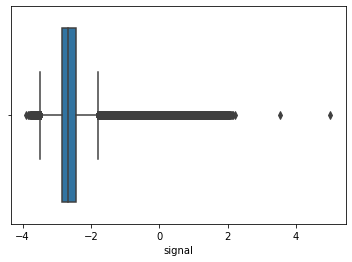

In [226]:
sns.boxplot(signal,data=dfnew)

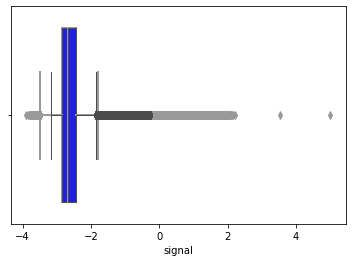

In [228]:
sns.boxplot(x='signal',data=df,color='w',linewidth=2)
sns.boxplot(x='signal',data=dfnew,color='b',linewidth=1)

In [229]:
df.shape,dfnew.shape

((1048575, 3), (996131, 3))

In [230]:
from scipy import stats
dfnew1=df[np.abs((stats.zscore(df[['signal']])))<3]

In [231]:
dfnew1

,time,signal,open_channels
0,0.0001,-2.7600,closed
1,0.0002,-2.8557,closed
2,0.0003,-2.4074,closed
3,0.0004,-3.1404,closed
4,0.0005,-3.1525,closed
...,...,...,...
1048570,104.8571,-2.4535,closed
1048571,104.8572,-2.8087,closed
1048572,104.8573,-2.8070,closed
1048573,104.8574,-1.5955,opened


Remove signal outliers 

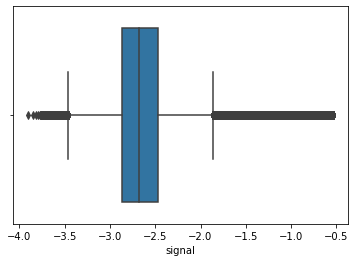

In [232]:
sns.boxplot(x='signal',data=dfnew1)

In [233]:
#Truncating the time values to floor
df['open_channels'].replace(1,'opened',inplace=True)
df['open_channels'].replace(0,'closed',inplace=True)

df['time']=df['time'].apply(np.floor)
df['time']

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
1048570    104.0
1048571    104.0
1048572    104.0
1048573    104.0
1048574    104.0
Name: time, Length: 1048575, dtype: float64

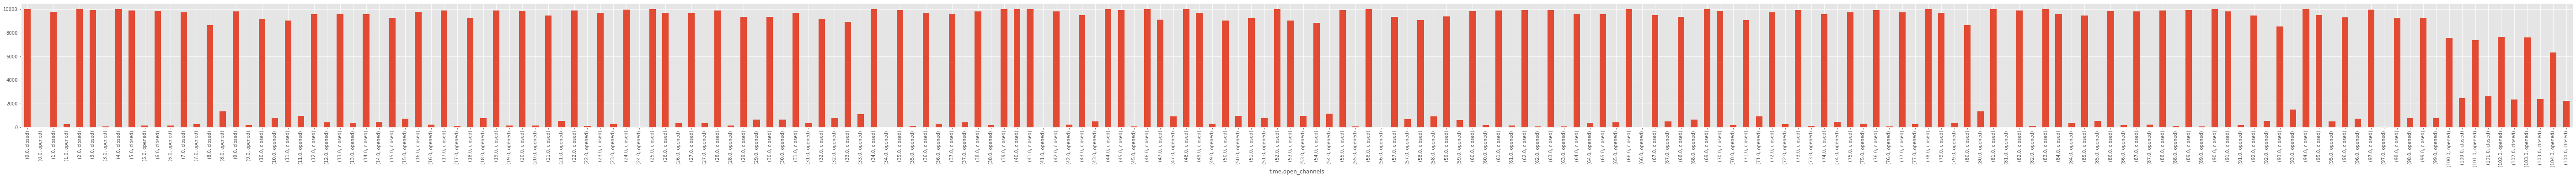

In [354]:
# plotting graph of time vs no opened and closed
plt.style.use('ggplot')
fig,ax =plt.subplots(figsize=(100,5))
df.groupby('time')['open_channels'].value_counts().plot(ax=ax,kind='bar')

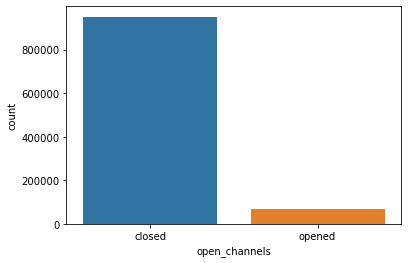

In [235]:
# plotting bar graph for total number of opened channel and closed channels for train dataset
sns.countplot(x='open_channels',data=dfnew1)

In [237]:
dfnew.head(2)

,time,signal,open_channels
0,0.0001,-2.7600,closed
1,0.0002,-2.8557,closed


In [269]:
dummy=pd.get_dummies(dfnew.open_channels,drop_first=True)
df4=pd.concat([dfnew,dummy],axis=1)
df4

,time,signal,open_channels,opened
0,0.0001,-2.7600,closed,0
1,0.0002,-2.8557,closed,0
2,0.0003,-2.4074,closed,0
3,0.0004,-3.1404,closed,0
4,0.0005,-3.1525,closed,0
...,...,...,...,...
1048570,104.8571,-2.4535,closed,0
1048571,104.8572,-2.8087,closed,0
1048572,104.8573,-2.8070,closed,0
1048573,104.8574,-1.5955,opened,1


In [289]:
# there we can apply oversampling mathod
x=df4.drop(['open_channels','opened'],axis='columns')
y=df4.opened

In [290]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X,Y=os.fit_resample(x,y)

In [291]:
len(X),len(Y)

(1855920, 1855920)

In [292]:
from collections import Counter as c
print(' original sample  y : ',c(y))
print('over sampling is y : ',c(Y))


 original sample  y :  Counter({0: 927960, 1: 68171})
over sampling is y :  Counter({0: 927960, 1: 927960})


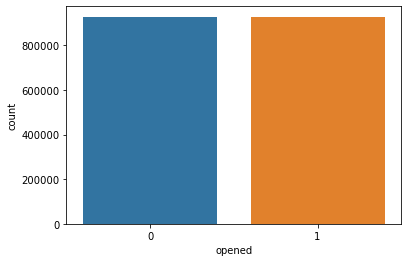

In [295]:
# Now our difendent values are equal
sns.countplot(Y)

In [302]:
# Trainnig the model with sklearn, KNN 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [328]:
# We don't know What is The perfect K value ,now just fix a value for exprement
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=10)

In [329]:
knn.score(Xtest,Ytest)

0.9987688046898573

In [330]:
predict=knn.predict(Xtest)

In [331]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(Ytest,predict)

array([[185639,    443],
       [    14, 185088]], dtype=int64)

In [348]:
classification_report(Ytest,predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    186082\n           1       1.00      1.00      1.00    185102\n\n    accuracy                           1.00    371184\n   macro avg       1.00      1.00      1.00    371184\nweighted avg       1.00      1.00      1.00    371184\n'

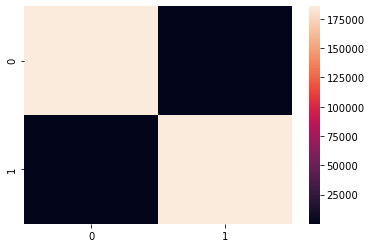

In [344]:
#verifying test score with confusion matrix and classification report there have precision ,recall and f1 score 
sns.heatmap(confusion_matrix(Ytest,predict))


In [321]:
# which K=? is perfect 
# calculating error for K values between 1 and 60 for train dataset d
error =[]
for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,Ytrain)
    pred_K= knn.predict(Xtest)
    error.append(np.mean(pred_K != Ytest))

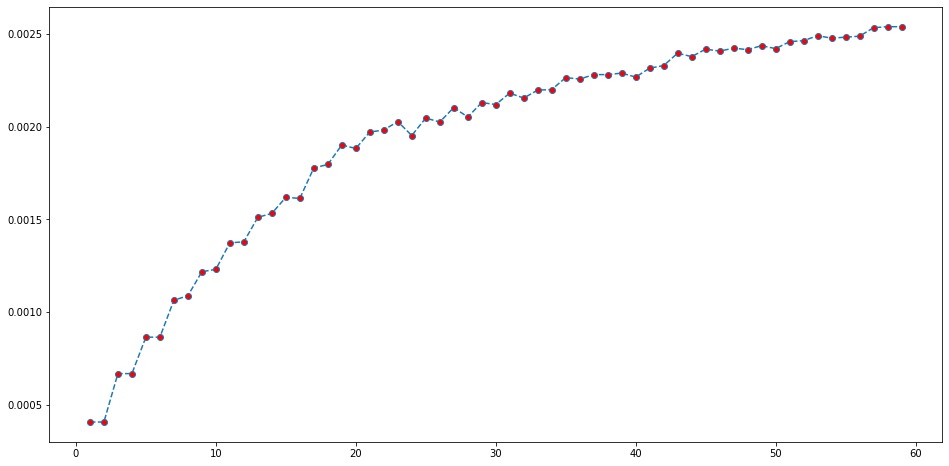

In [326]:
plt.figure(figsize=(16,8))
plt.plot(range(1,60),error,linestyle='dashed',marker='o',markerfacecolor='red')

In [327]:
# now we  can see what is the best K=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain,Ytrain)
knn.score(Xtest,Ytest)

0.9993318677529204

In [339]:
confusion_matrix(Ytest,predict)
#classification_report(Ytest,predict,)

array([[185639,    443],
       [    14, 185088]], dtype=int64)

In [350]:
# save model with pickle
import pickle
with open ('lon_switching','wb') as f:
    pickle.dump(knn,f)
    